**ENDAH SIWI CAHYANINGRUM**    
Purwokerto, Banyumas Jawa Tengah

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy

In [ ]:
#download dataset

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-14 15:57:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.20MB/s    in 4m 36s  

2021-04-14 16:02:17 (1.12 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip

import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#membuat folder 

%mkdir  /tmp/dataset/imgs/paper -p
%mkdir  /tmp/dataset/imgs/rock -p
%mkdir  /tmp/dataset/imgs/scissors -p

In [ ]:
#menyalin data

!cp /tmp/rockpaperscissors/paper/* /tmp/dataset/imgs/paper
!cp /tmp/rockpaperscissors/rock/* /tmp/dataset/imgs/rock
!cp /tmp/rockpaperscissors/scissors/* /tmp/dataset/imgs/scissors

# Split Data

In [ ]:
pip install split-folders

In [ ]:
import splitfolders
orig_path = '/tmp/dataset/imgs/'
output_path = '/tmp/dataset/data'
splitfolders.ratio(orig_path, output=output_path, seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 4402.86 files/s]


In [ ]:
train_dir = '/tmp/dataset/data/train'
validation_dir = '/tmp/dataset/data/val'

In [ ]:
# membuat direktori 'paper' pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori ruangan 'rock' pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori 'scissors' pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')



# membuat direktori 'paper' pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori 'rock' pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

# membuat direktori 'rscissors' pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

# Augmentasi

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(200, 200),  # mengubah resolusi seluruh gambar menjadi 200x200 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(200, 200), # mengubah resolusi seluruh gambar menjadi 200x200 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Model CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['categorical_accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=100,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=100,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
100/100 - 41s - loss: 1.1047 - categorical_accuracy: 0.3900 - val_loss: 1.0894 - val_categorical_accuracy: 0.4475
Epoch 2/20
100/100 - 8s - loss: 0.9933 - categorical_accuracy: 0.5025 - val_loss: 0.7739 - val_categorical_accuracy: 0.6625
Epoch 3/20
100/100 - 8s - loss: 0.6361 - categorical_accuracy: 0.7475 - val_loss: 0.3371 - val_categorical_accuracy: 0.8575
Epoch 4/20
100/100 - 8s - loss: 0.3471 - categorical_accuracy: 0.8650 - val_loss: 0.4102 - val_categorical_accuracy: 0.8700
Epoch 5/20
100/100 - 8s - loss: 0.3041 - categorical_accuracy: 0.8900 - val_loss: 0.2561 - val_categorical_accuracy: 0.9350
Epoch 6/20
100/100 - 8s - loss: 0.2964 - categorical_accuracy: 0.8950 - val_loss: 0.2911 - val_categorical_accuracy: 0.9000
Epoch 7/20
100/100 - 8s - loss: 0.2361 - categorical_accuracy: 0.9150 - val_loss: 0.2273 - val_categorical_accuracy: 0.9200
Epoch 8/20
100/100 - 8s - loss: 0.2630 - categorical_accuracy: 0.9200 - val_loss: 0.2024 - val_categorical_accuracy: 0.9200
Epoch 9

# Prediksi

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png
Rock


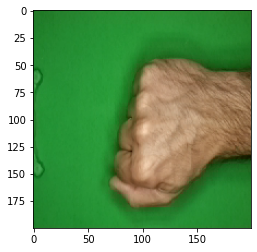

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  array = model.predict(x)
  result = array[0]
  answer = np.argmax(result)
  
  print(fn)
  if answer==0:
    print('Paper')
  elif answer == 1:
    print('Rock')
  elif answer == 2:
    print('Scissors')